**EN ESTE DATASET SE ENCUENTRA UNA RECOPILACION SOBRES LOS INCIDENTES ESCOLARES CON ARMAS DE FUEGO QUE SUCEDIERON ES USA**

##FUENTES



*   https://www.washingtonpost.com/education/interactive/school-shootings-database/ (fuente del dataset)
*   https://github.com/washingtonpost/data-school-shootings/blob/master/LICENSE (fuente del dataset)

* https://nces.ed.gov/pubs2018/2018052/tables/table_02.asp (fuente de cantidad de escuelas por estado)

##LIBRERIAS UTILIZADAS PARA LA LIMPIEZA Y EL ANÁLISIS DEL CONJUNTOS DE DATOS

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from plotnine.data import mtcars
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Polygon
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.ticker import MaxNLocator
import numpy as np
import warnings
warnings.filterwarnings('ignore')

##CARGA Y LIMPIEZA DEL DATASET

In [20]:
#Cambiamos HIspanic a h para que sea igual al resto de datos, ya que solo queremos la inicial
#Luego remplazmos la ',' por nada o '' ya que los valores estan con , cada mil valores
#despues lo convertimos en un dato tipo float, ya antes era un dato tipo object
#luego creamos un data frame con los datos de la longitud y latitud, adaptados para el mapa de los Estado Unidos usando el sistema de referencia "EPSG:4326"

school_shooting_data_raw = pd.read_csv("https://raw.githubusercontent.com/Gonzaloc-71/TP-FCD/main/school-shootings-data.csv")
school_shooting_data_raw['race_ethnicity_shooter1'].replace(to_replace='Hispanic', value='h', inplace=True)
school_shooting_data_raw['enrollment'].replace(to_replace=',', value="",inplace=True, regex=True)
school_shooting_data_raw['enrollment'] = school_shooting_data_raw['enrollment'].astype(float)
school_shooting_cord = gpd.GeoDataFrame(school_shooting_data_raw, geometry=gpd.points_from_xy(school_shooting_data_raw.long, school_shooting_data_raw.lat), crs="EPSG:4326")

In [21]:
#recortamos las 3 priemras filas del data set, ya que tiene un titulo y diferente informacion que corrompen el Data set
#tambien sacamos a partir de la fila 62, ya que tienee el derecho de autor y otros links al final del archivo tipo excel

escuelas = pd.read_excel("https://raw.githubusercontent.com/Gonzaloc-71/TP-FCD/main/table_02.xlsx")
escuelas = escuelas.iloc[3:]
escuelas = escuelas.iloc[:62]

In [22]:
#seguimos con la limpieza, esta vez, queremos renombrar las priemras columans, ya que aparecen sin nombre o como "unnamed"
#luego, se emiminan las columans que contengan el titulo "unnamed"
#tambien, se eliminan las filas cond atos faltantes, y se resetea los indicies, ya que habia un estado repetido en el Data set, y eso afectaba a nuestro indice

escuelas = escuelas.rename(columns={escuelas.columns[0]: 'state'})
escuelas = escuelas.rename(columns={escuelas.columns[1]: 'numero_de_escuelas_por_estado'})
escuelas.drop(escuelas.columns[escuelas.columns.str.contains('unnamed' ,case=False)], axis =1, inplace =True)
escuelas = escuelas.dropna()
escuelas = escuelas.drop(escuelas.index[0])
escuelas = escuelas.reset_index()
escuelas = escuelas.drop(columns='index')

In [23]:
escuelas_merged = pd.merge(school_shooting_cord, escuelas, on = 'state')

##DESCRIPCION DEL DATASET LEGIDO

**La temática que se trata en este Dataset es sobre los casos de tiroteos en las diferentes escuelas de Estados Unidos, con la cantidad de damnificados, la edad del tirador, la/s arma/s que uso o usaron, como lo consiguieron, etc.**

#DICCIONARIO DE LAS VARIABLES DEL DATASET ELEGIDO



* uid : Identificador unico autoincremental
* nces_school_id : Identificador unico por escuela y distrito (los primeros dos dígitos identifican el estado y los últimos cinco identifican el distrito escolar)
* school_name : Nombre de la escuela
* nces_district_id : Identificador unico por distrito
* district_name : Nombre del distrito
* date : Fecha del tiroteo
* school_year : Año escolar
* year : Año
* time : Tiempo aproximado del tiroteo
* day_of_week : Dia de la semana
* city : Ciudad donde esta localizada la escuela
* state : Estado donde esta localizada el estado
* school_type : Tipo de escuela (publica o privada)
* enrollment : Precio de la cuota de inscripcion en la fecha que ocurrio el tiroteo
* killed : Cantidad de personas asesinadas
* injured : Cantidad de personas heridas
* casualties : Cantidad de personas asesinadas y heridas
* shooting_type : Tipo de tiroteo :
  1. accidental -> Accidental : El arma se disparo accidentalmente
  2.  hostage suicide -> asesinato de rehenes: El tirador toma la vida del rehen antes de suicidarse
  3. indiscriminate	-> indiscriminado : El tirador disparo de manera indiscriminada ante cualquier victima
  4. public suicide	-> Suicidio publico : El tirador intento suicidarse en un lugar publico
  5. targeted -> Objetivo particular : El tirador disparo el arma a proposito a un objetivo previsto
  6. unclear -> Desconocido : Tipo de tiroteo desconocido

* age_shooter1 : Edad del primer tirador
* gender_shooter1 : Genero del primer tirador
* race_ethnicity_shooter1 : Raza etnica del primer tirador :
  1. a -> Asiatico
  2. ai -> Native american
  3. b -> Negro
  4. h -> Hispano
  5. w -> White
* shooter_relationship1 : Relacion del primer tirador con la escuela
* shooter_deceased1 : Indicador sobre la vida del primer tirador :
  1. 1 -> El tirador murio durante el tiroteo
  2. 0 -> El tirador no murio durante el tiroteo o no se conoze su estado
* deceased_notes1 : Si el priemr tirador murio, de que manera
* age_shooter2 : Edad del segundo tirador
* gender_shooter2 : Genero del segundo tirador
* race_ethnicity_shooter2 : Raza etnica del segundo tirador :
  1. a -> Asiatico
  2. ai -> Native american
  3. b -> Negro
  4. h -> Hispano
  5. w -> White
* shooter_relationship2 : Relacion del segundo tirador con la escuela
* shooter_deceased2 : Indicador sobre la vida del segundo tirador :
  1. 1 -> El tirador murio durante el tiroteo
  2. 0 -> El tirador no murio durante el tiroteo o no se conoze su estado
* white : Cantidad de alumnos de raza etnica blanca en el momento del tiroteo
* black : Cantidad de alumnos de raza etnica negra en el momento del tiroteo
* hispanic : Cantidad de alumnos de raza etnica hispana en el momento del tiroteo
* asian : Cantidad de alumnos de raza etnica asiatica en el momento del tiroteo
* american_indian_alaska_native : Cantidad de alumnos de raza etnica alaska nativos en el momento del tiroteo
* hawaiian_native_pacific_islander : Cantidad de alumnos de raza etnica hawaiano en el momento del tiroteo
* two_or_more : Cantidad de alumnos que sean de 2 (dos) o mas razas etnicas en el momento del tiroteo
* resource_officer : Presencia de un policia escolar (resource officer) o un policia normal en el area cercana al momento del tiroteo :
  1. 1 -> Habia un policia escolar o policia normal en el area cercana
  2. 0 -> No habia un policia escolar o policia normal en el area cercana o se desconoce esta informacion
* weapon : arma/s utilizadas en el tiroteo
* weapon_source	: Dónde el tirador consiguio las arma/s utilizadas en el tiroteo
* lat : Latitud donde se ecnuentra la escuela
* long : Longitud donde se encuentra la escuela
* staffing : Profesores titulares (o staff) presentes a la hora del tiroteo
* low_grade : Menor grado escolar ofrecido por la escuela
* high_grade : Mayor grado escolar ofrecido por la escuela
* lunch : Cantidad de alumnos con becas o descuentos para el almuerzo
* county : Nombre del condado donde se encuentra la escuela
* state_fips : Código FIPS de dos dígitos del estado (se asemaja a un codigo postal pero en este caso es por estado)
* county_fips : Código FIPS de cinco dígitos del condado (se asemaja a un codigo postal pero en este caso es por condado)
* ulocale : Código de localización urbana del centro nacional de estadísticas de educación :
  1. 11 -> Ciudad, territorio grande dentro de un área urbanizada y dentro de una ciudad principal con una población de 250,000 o más
  2. 12 -> Ciudad, territorio de tamaño mediano dentro de un área urbanizada y dentro de una ciudad principal con una población de menos de 250,000 y mayor o igual a 100,000
  3. 13 -> Ciudad, territorio pequeño dentro de un área urbanizada y dentro de una ciudad principal con una población de menos de 100,000
  4. 21 -> Suburbio, territorio grande fuera de una ciudad principal y dentro de un área urbanizada con una población de 250,000 o más
  5. 22 -> Suburbio, territorio de tamaño mediano fuera de una ciudad principal y dentro de un área urbanizada con una población de menos de 250,000 y mayor o igual a 100,000
  6. 23 -> Suburb, Small Territory outside a principal city and inside an urbanized area with a population less than 100,000.
  7. 31 -> Pueblo, territorio en la periferia dentro de un conglomerado urbano que está a menos de o igual a 10 millas de un área urbanizada
  8. 32 -> Pueblo, territorio distante dentro de un conglomerado urbano que está a más de 10 millas y menos de o igual a 35 millas de un área urbanizada
  9. 33 -> Pueblo, territorio remoto dentro de un conglomerado urbano que está a más de 35 millas de un área urbanizada
  10. 41 -> Rural, territorio rural definido por el censo en la periferia que está a menos de o igual a 5 millas de un área urbanizada, así como territorio rural que está a menos de o igual a 2.5 millas de un conglomerado urbano
  11. 42 -> Rural, territorio rural definido por el censo que está a más de 5 millas pero menos de o igual a 25 millas de un área urbanizada, así como territorio rural que está a más de 2.5 millas pero menos de o igual a 10 millas de un conglomerado urbano
  12. 43 -> Rural, territorio rural definido por el censo que está a más de 25 millas de un área urbanizada y también está a más de 10 millas de un conglomerado urbano
* gemoetry : punto geografico (longitud, latitud) para el analizis con la libreria geopandas
* numero_de_escuelas_por_estado : numero de escuelas por estado


# Análisis descriptivo de datos

In [24]:
def calcular_estadisticas(columns):
    """
    Calcula estadísticas descriptivas para las columnas especificadas

    Parámetro:
    columnas : lista con las columnas a las cuales se les calcularán las estadísticas

    Return:
    Un DataFrame con las columnas y sus estadísticas.
    """
    dic_describe = {}


    for column in columns:

        col_data = school_shooting_data_raw[column].dropna()
        dic_describe[column] = {
            "Mediana": int(col_data.quantile(0.5)),
            "Maximo": int(col_data.max()),
            "Minimo": int(col_data.min()),
            "Media": int(col_data.mean()),
            "Cantidad": int(col_data.count())
        }

    dic_describe = pd.DataFrame(dic_describe)

    return dic_describe

---
---
---
---

In [25]:
calcular_estadisticas(['staffing'])

,staffing
Mediana,55
Maximo,203
Minimo,3
Media,61
Cantidad,363


Se observa que en el 50% de los casos de tiroteos se dan en escuelas que tienen hasta 55 trabajadores, también hubo un tiroteo donde habia 203 trabajadores (contando profesores y cualquier personal que trabaje en la institución), y una escuela donde habia 3 trabajadores, parece ser algun tipo de escuela rural, se podría deducir que el problema de los tiroteos no solo sucede en metropolis, si no también en pueblos o pequeñas ciudades.

# Representacion grafica de los tiroteos en el mapa de los EEUU y sus estados

**Mapa EEUU**

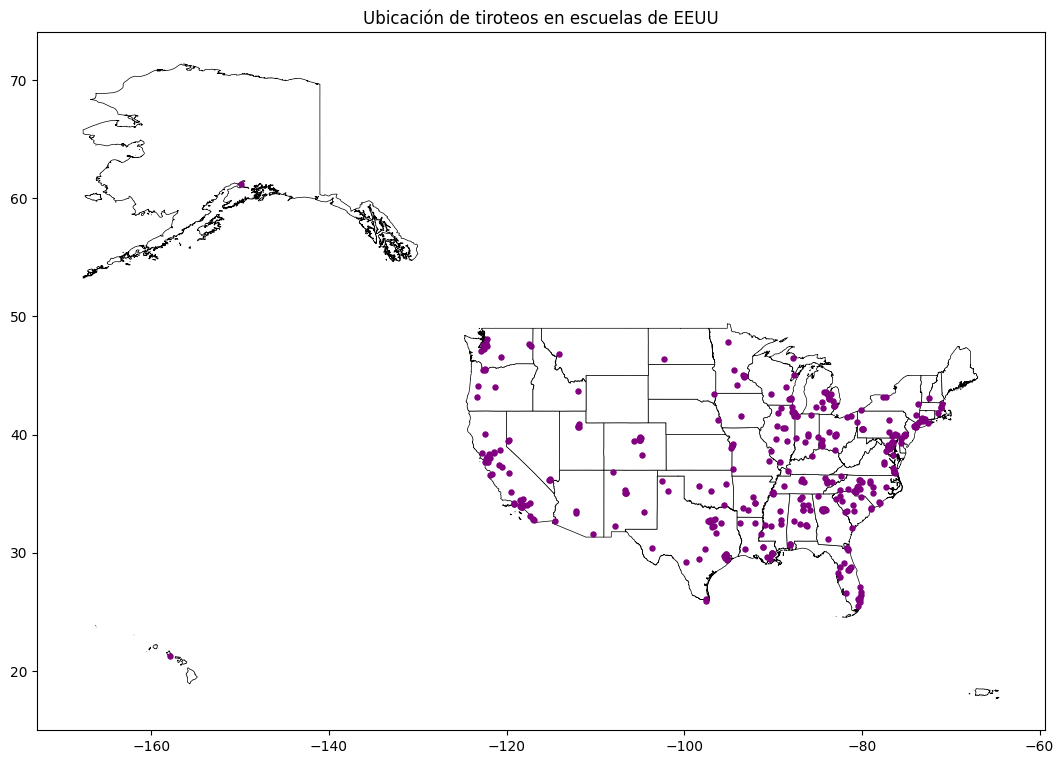

In [26]:
# MAPA DE LOS ESTADOS UNIDOS CON LOS LUGARES DE LOSA CCIDENTES REPRESENTADOS COMO PUNTOS VIOLETAS


# SE RECORTA EL TAMANO DE LA IMAGEN, YA QUE HAY QUE ADAPTAR EL MAPA MUNDIAL A SOLO ESTADOS UNIDOS
states = gpd.read_file("https://raw.githubusercontent.com/Gonzaloc-71/TP-FCD/8c356ac79ee3f9a4c1568be224186b16ada0a803/us/cb_2018_us_state_500k.shp")
fig, ax1 = plt.subplots(1, figsize=(13, 23))
# Creo un poligono que tenga las coordenadas de eeuu como puntos
polygon = Polygon([(-167.65,14.92),(-167.65,72),(60,72),(60,14.92)])
usa_states = states.clip(polygon).plot(ax=ax1, edgecolor='black',linewidth=0.5,color='white')
# Marcamos los puntos donde haya escuelas donde hubieron tiroteos
school_shooting_cord.plot(ax=usa_states, marker='o',markersize=13, color='purple')
plt.title('Ubicación de tiroteos en escuelas de EEUU')
plt.show()

Se observa que hay una concentración mayor sobre California, Florida, New York, Washington DC, Texas, Carolina del Norte y Carolina del Sur.
Por el contrario en Wyoming, Dakota del sur, Nebraska y Kansas la concentración es menor que en los otros estados.

---
---
---
---

In [27]:
#Buscamos cual es el estado con mas tiroteos registrados

cantidad_maxima = school_shooting_cord[['state']]
cantidad_maxima.value_counts().reset_index().head()

,state,count
0,California,40
1,Texas,25
2,Florida,24
3,North Carolina,21
4,Pennsylvania,17


---
---
---
---

**Mapa California**

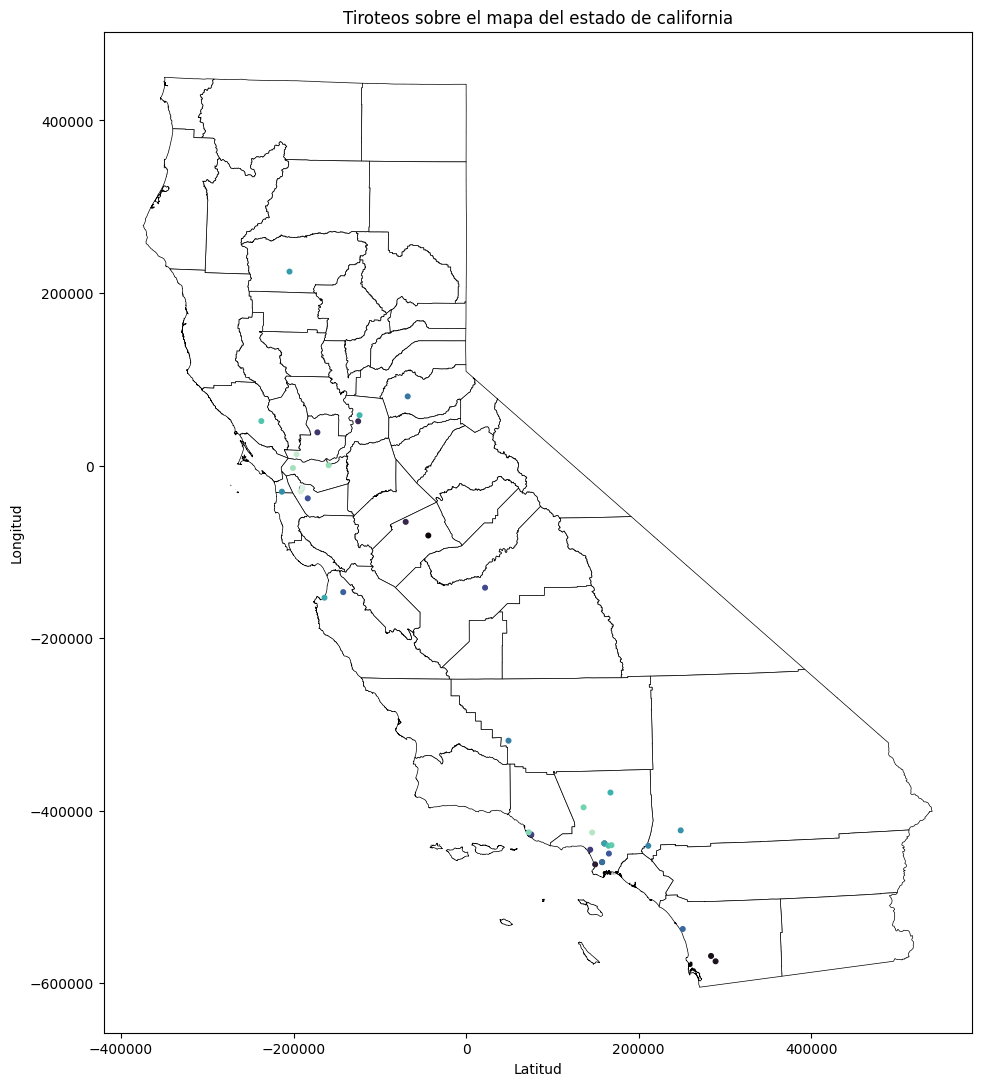

In [28]:
#Cargamos el estado de California con sus respectivas fronteras

california_map = gpd.read_file("https://raw.githubusercontent.com/Gonzaloc-71/TP-FCD/d60c10e43006a58fb9f5942a6f75d6a7123996f5/data/cnty24k09_1_multipart.shp")

#guardamos en una variable los tireoteos en california representados por puntos
solo_puntos = school_shooting_cord[['state','geometry']]
puntos_california = solo_puntos[solo_puntos['state'] == 'California']
solo_puntos = puntos_california[['geometry']]

#Tranformamos las cordenadas de los tiroteos con el sistema de cordenadas del mapa de california
solo_puntos = solo_puntos.to_crs(california_map.crs)

fig, ax = plt.subplots(figsize=(13, 13))

california_map.plot(edgecolor='black', linewidth=0.5, color='white', ax=ax)

solo_puntos.plot(ax=ax, marker='o', markersize=11, cmap='mako')
ax.set_aspect('equal')

plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.title("Tiroteos sobre el mapa del estado de california")
plt.show()

Podemos observar que en Los Angeles y San Francisco se encuentra la mayor cantidad de escuelas tiroteadas.

# Apartado donde se evalúan con gráficos las diferentes comparaciones entre columnas de interés

#*Gráfico de boxplot o de caja*

In [29]:
# Guardamos en 2 variables las columnas de las edades de los tiradores
g1 = escuelas_merged['age_shooter1']

g2 = escuelas_merged['age_shooter2']

fig = go.Figure()
fig.add_trace(go.Box(x=g2, name='Tirador secundario'))
fig.add_trace(go.Box(x=g1, name='Tirador principal'))
fig.update_layout(xaxis_title="Edad de los tiradores", yaxis_title="Tiradores")
fig.update_layout(title='Distribución de las edades de los tiradores')
fig.show()

Podemos observar que la mediana de la edad del tirador principal se encuentra en 16 años, la mediana de la edad del tirador secundario se encuentra en 17 años, el tirador principal más viejo es de 72 años, el tirador principal mas joven es de 6 años, el rango intercuartílico es de 4 años, es decir el 50% central de las edades se encuentra entre 19 y 15 años

#*Gráfico de dispersión o scatterplot*

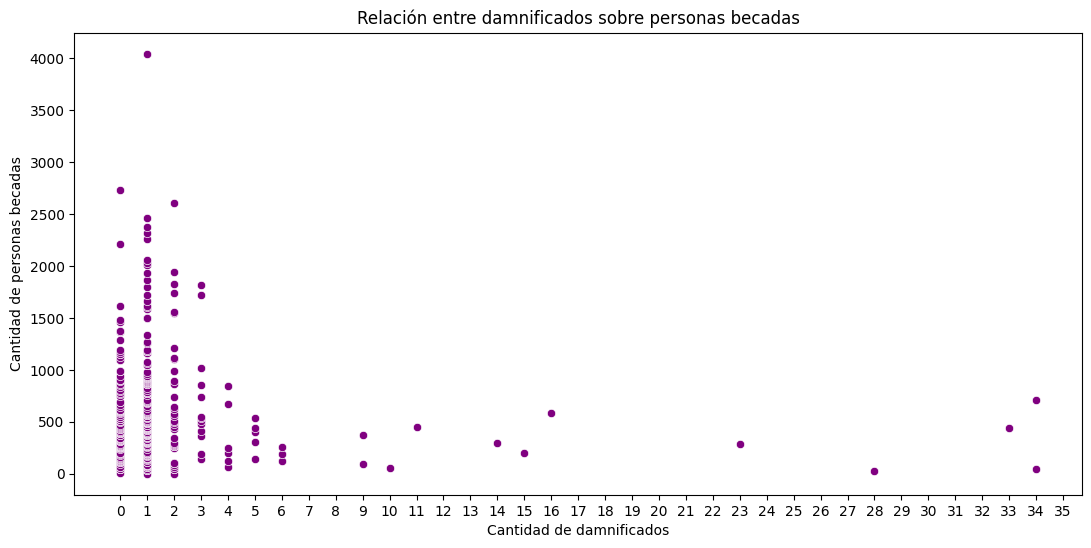

In [30]:
#Cambio el tipo de dato de la columna lunch a numerico y en el caso de que no se pueda, ingreso un NaN
escuelas_merged['lunch'] = pd.to_numeric(escuelas_merged['lunch'], errors='coerce')

tabla_becados_damnificados = escuelas_merged.sort_values(by=['casualties','lunch'])

plt.figure(figsize=(13,6))
sns.scatterplot(data=tabla_becados_damnificados, x="casualties", y="lunch", color='purple')
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35],labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35])
plt.title('Relación entre damnificados sobre personas becadas')
plt.xlabel('Cantidad de damnificados')
plt.ylabel('Cantidad de personas becadas')
plt.show()

Aca podemos observar que la cantidad de damnificados en los tiroteos no tiene una relación con la cantidad de personas becadas en la escuela, aunque la mayoría de los casos con más damnificados se encuentran en escuelas con pocas personas becadas

---
---
---
---

In [31]:
calcular_estadisticas(['enrollment'])

,enrollment
Mediana,869
Maximo,5264
Minimo,22
Media,1072
Cantidad,387


Según lo observado podriamos concluir que en el 50% de las escuelas donde hubo tiroteos parecen ser escuelas donde la cuota es "baja" y el otro 50% de las escuelas donde hubo tiroteos parecen ser escuelas donde la cuota va de "mediana" a "alta". Esto ratifica que este fenomeno ocurre en todas las clases sociales.

#*Gráfico de lineas*

In [32]:
#Agarro la columna de los años y cuento la cantidad de casos por año, reseteo el índice y lo ordeno por año
tabla_cantidad_tiroteos_año = escuelas_merged['year'].value_counts().reset_index().sort_values(by='year')

#Cambio el nombre de la columna para no tener errores en proceso de graficarlo
tabla_cantidad_tiroteos_año.rename(columns={'count': 'cantidad'}, inplace=True)

fig = px.line(tabla_cantidad_tiroteos_año, x='year', y ='cantidad', text='year', title='Tiroteos por año')
fig.update_traces(textposition="top center")
fig.update_layout(xaxis_title='Año', yaxis_title='Cantidad de tiroteos')
fig.show()

En este grafico podemos observar que a lo largo de los años se fue aumentando la cantidad de tiroteos en escuelas, exceptuando el caso de 2020 que hubo una pandemia. El año con más tiroteos fue 2022. En general la cantidad de tiroteos por año va en aumento.
Además se puede agregar que en 2023 solo se tienen registrados datos hasta agosto.


#*Gráfico de torta o pie*

In [33]:
#Agarro los tipos de tiroteos y su cantidad, después calculo sus porcentajes sobre el total
tabla_escuelas = escuelas_merged['shooting_type'].value_counts().reset_index()
tabla_escuelas['porcentaje'] = tabla_escuelas['count']*100/sum(tabla_escuelas['count'])

#Selecciono los 6 primeros tipos de tiroteos, ya que los ultimos tienen 1 solo caso c/u.
tabla_acortada = tabla_escuelas.head(6)

fig = go.Figure(data=[go.Pie(labels= tabla_acortada['shooting_type'], values=tabla_acortada['count'], textinfo='label+percent', insidetextorientation='radial', hole=.25)])
fig.show()

Mirando este grafico podemos ver que la mayoría de los tiroteos fueron dirigidos (objetivo en particular) y la 2da razón más registrada fueron tiroteos indiscriminados. Sabiendo esto, se podría deducir que las causas de los tiroteos son bullying, discriminación, etc.

#*Gráfico de barras o barplot*

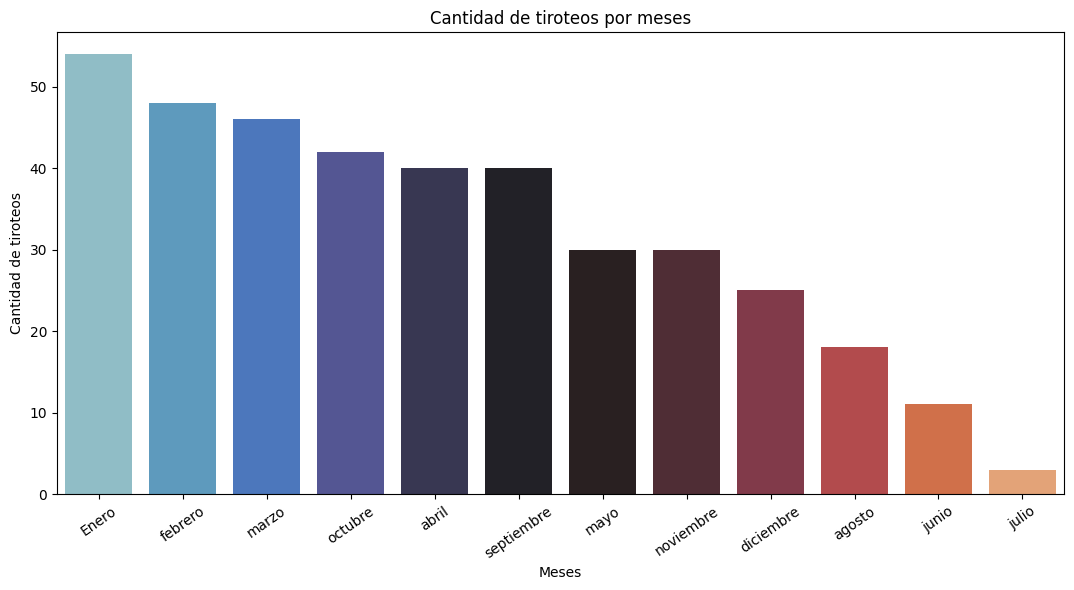

In [34]:
#Reemplazo y transformo el tipo de dato en la columna date a tipo fecha, ya que es string
escuelas_merged['date'] = pd.to_datetime(escuelas_merged['date'])

#Separo el mes en una columna
escuelas_merged['month'] = escuelas_merged['date'].dt.month

#Reemplazo los números correspondientes a cada mes por su nombre.
escuelas_merged['month'].replace(to_replace={1:'Enero',2:'febrero',3:'marzo',4:'abril',5:'mayo',6:'junio',7:'julio',8:'agosto',9:'septiembre',10:'octubre',11:'noviembre',12:'diciembre'},inplace=True)

#Guardo en una tabla la cantidad de tiroteos por mes y lo graficamos
cantidad_de_tiroteos_por_mes = escuelas_merged[['month']].value_counts().reset_index()

plt.figure(figsize=(13,6))
sns.barplot(x = 'month', y = 'count', data = cantidad_de_tiroteos_por_mes, hue = 'month', palette = 'icefire')
plt.xticks(rotation=35)
plt.xlabel('Meses')
plt.ylabel('Cantidad de tiroteos')
plt.title('Cantidad de tiroteos por meses')
plt.show()

Aqui podemos observar que la mayoría de los tiroteos se hicieron sobre enero, febrero y marzo (invierno), y obviamente por temas de vacaciones escolares en agosto, junio y julio fueron los meses con menor cantidad de tiroteos

#*Gráfico de conteo o countplot*

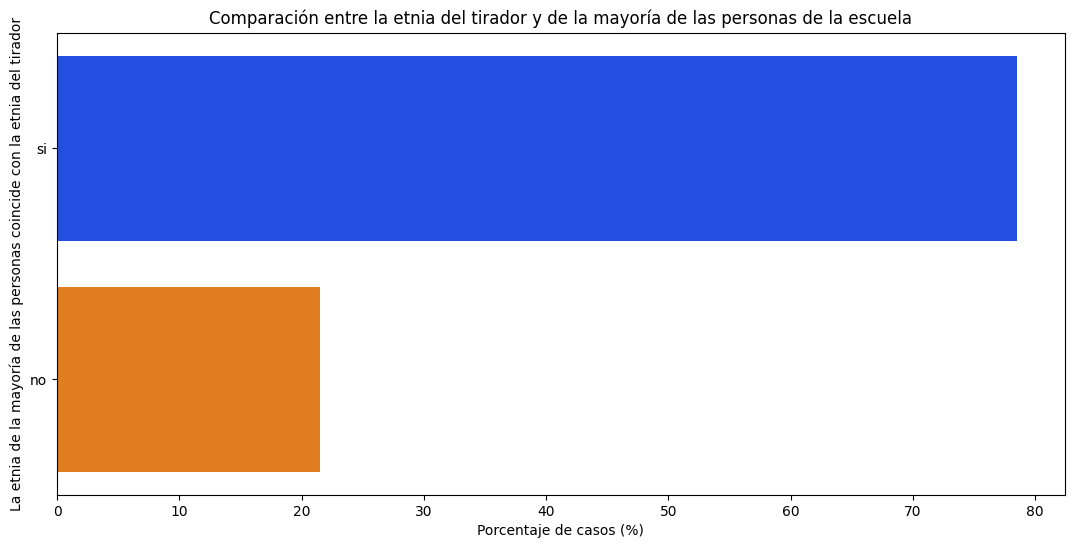

In [35]:
#Se agrupan todos los tipos de etnia y se limpian las columnas ocn demasiados dataos faltantes

etnia = escuelas_merged[['white','black','hispanic','asian','american_indian_alaska_native','hawaiian_native_pacific_islander']]
etnia = etnia.dropna(subset='hispanic')

#Se transforma el tipo de dato "hispanic" a str (string) usando regex y luego a int (entero) y luego se vuelven a agrupar los distintios grupos de datos
etnia['hispanic'] = etnia['hispanic'].str.replace('[^0-9]', '', regex=True)
etnia['hispanic'] = etnia['hispanic'].astype(int)

#Agrego una columna con la etnia del tirador y reseteo los indices para tener un dataframe
etnia['shooter_etnia'] = escuelas_merged['race_ethnicity_shooter1']
etnias = etnia.dropna(subset='shooter_etnia').reset_index().drop('index',axis=1)

#Agrego una columna con la etnia de la mayoría de las personas
etnias['mayoria_personas'] = etnias.idxmax(numeric_only=True,axis=1)

#Reemplazo en la columna de la etnia de la mayoría de las peronas para que se pueda comparar con la del tirador
etnias['mayoria_personas'].replace(to_replace={'white':'w','black':'b','hispanic':'h','american_indian_alaska_native':'ai'},inplace=True)

#Agrego mi ultima columna que me devuelve un booleano dependiendo si la mayoría de las personas coinciden con la etnia del tirador
etnias['mayoria_shooter'] = etnias['shooter_etnia'] == etnias['mayoria_personas']
etnias['mayoria_shooter'].replace(to_replace={True:'si', False:'no'},inplace=True)

plt.figure(figsize=(13,6))
sns.countplot(data=etnias, y='mayoria_shooter',stat='percent', palette='bright', hue='mayoria_shooter')
plt.xlabel('Porcentaje de casos (%)')
plt.ylabel('La etnia de la mayoría de las personas coincide con la etnia del tirador')
plt.title('Comparación entre la etnia del tirador y de la mayoría de las personas de la escuela')
plt.show()

Se puede observar que en la mayoría de los tiroteos la etnia del tirador coincide con la etnia de la mayoría de las personas, entonces se podria pensar que la causa de los tiroteos no son por discriminación etnica

#*Gráfico de barras horizontales o barplot*

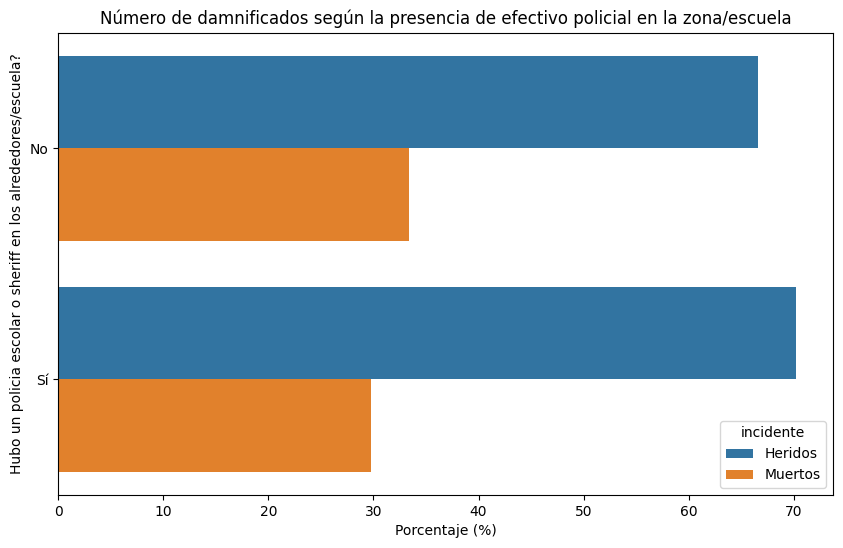

In [36]:
#Creo una tabla donde tenga heridos, muertos y resource officer como columnas
tabla_resource_officer = escuelas_merged[['resource_officer','injured','killed']]

#Cambio el nombre asi lo manejo en español.
tabla_resource_officer.rename(columns={'injured':'Heridos','killed':'Muertos'},inplace=True)

#Cambio el tipo de dato en resource officer, de 1 o 0 a Si o No, respectivamente.
tabla_resource_officer['resource_officer'] = tabla_resource_officer['resource_officer'].apply(lambda x: 'Sí' if x == 1 else 'No')

#Llevo el incidente a columna, para después poder diferenciarlo en el grafico con un hue
tabla_larga_rso = pd.melt(tabla_resource_officer, id_vars = ['resource_officer'], value_vars= ['Heridos','Muertos'], var_name= 'incidente')

#Me guardo en una tabla sus valores totales en cada caso y después hago sus subtotales según la columna resource officer, es decir, si hay o no hay un policia en el tiroteo
tabla_rso_muertes_heridos = tabla_larga_rso.groupby(['resource_officer','incidente']).sum().reset_index()
tabla_rso_muertes_heridos['total'] = tabla_rso_muertes_heridos.groupby('resource_officer')['value'].transform('sum')

#Guardo el valor del porcentaje de cada caso sobre su subtotal
tabla_rso_muertes_heridos['porcentaje'] = tabla_rso_muertes_heridos['value'] / tabla_rso_muertes_heridos['total'] *100


plt.figure(figsize=(10,6))
sns.barplot(y = 'resource_officer',x='porcentaje', data= tabla_rso_muertes_heridos, hue = 'incidente')
plt.xlabel('Porcentaje (%)')
plt.title('Número de damnificados según la presencia de efectivo policial en la zona/escuela')
plt.ylabel('Hubo un policia escolar o sheriff en los alrededores/escuela?')
plt.show()

En base al grafico podemos observar que en los casos donde hubo un policia escolar o sheriff/policia en los alrededores la cantidad de heridos/muertos fue menor que en los casos contrarios. Se puede deducir que tener un policia escolar ayudaría a reducir la cantidad de victimas en los tiroteos